---
### <center> Carga de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Dataset: "Generación Histórica"

In [2]:
# Carga y visualización parcial de Datos:
df = pd.read_csv('datasets/generacin-histrica.csv')
df.head(5)

,anio,mes,maquina,central,agente,agente_descripcion,region,pais,tipo_maquina,fuente_generacion,tecnologia,categoria_hidraulica,categoria_region,generacion_neta_MWh,indice_tiempo
0,2012,1,3ARRDI01,3ARR,QUIL3A3A,QUILMES - PLANTA TRES ARROYOS,BUENOS AIRES,Argentina,MOTOR DIESEL,Térmica,DI,NaN,Gba - Litoral - Buenos Aires,0.000,2012-01
1,2012,1,ACAJTG01,CAPE,CAPEX-QA,CAPEX S.A. AUTOGENERADOR,COMAHUE,Argentina,TURBO GAS,Térmica,CC,NaN,Comahue,21868.984,2012-01
2,2012,1,ACAJTG02,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Argentina,TURBO GAS,Térmica,CC,NaN,Comahue,24144.517,2012-01
3,2012,1,ACAJTG03,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Argentina,TURBO GAS,Térmica,CC,NaN,Comahue,24259.713,2012-01
4,2012,1,ACAJTG04,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Argentina,TURBO GAS,Térmica,CC,NaN,Comahue,26832.135,2012-01


#### Dataset: "Demanda Histórica"

In [3]:
# Carga y visualización parcial de Datos:
df2 = pd.read_csv('datasets/demanda-histrica.csv')
df2.head(5)

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
0,2012,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2222.628,2012-01
1,2012,1,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,536.858,2012-01
2,2012,1,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,336.297,2012-01
3,2012,1,ACINROSY,ACINDAR ROSARIO EX-NAVARRO,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,601.066,2012-01
4,2012,1,ACINTBOY,ACINDAR PTA. TABLADA,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,3076.618,2012-01


---
### <center> Preparación de Datos

#### Dataset: "Generación Histórica"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91543 entries, 0 to 91542
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anio                  91543 non-null  int64  
 1   mes                   91543 non-null  int64  
 2   maquina               91543 non-null  object 
 3   central               91543 non-null  object 
 4   agente                91543 non-null  object 
 5   agente_descripcion    91543 non-null  object 
 6   region                91543 non-null  object 
 7   pais                  91543 non-null  object 
 8   tipo_maquina          91543 non-null  object 
 9   fuente_generacion     91543 non-null  object 
 10  tecnologia            91543 non-null  object 
 11  categoria_hidraulica  9349 non-null   object 
 12  categoria_region      91543 non-null  object 
 13  generacion_neta_MWh   91543 non-null  float64
 14  indice_tiempo         91543 non-null  object 
dtypes: float64(1), int6

In [5]:
# Chequeo de registros duplicados:
df.duplicated().value_counts()

False    91543
dtype: int64

Observamos que el DataFrame posee 91543 registros, y que cada columna posee la misma cantidad de objetos no nulos (ni *'Nan'* ni *'None'*) a excepción de *'categoria_hidraulica'*, aunque esta es una columna no significativa para nuestro análisis. Además, no existen registros duplicados.

In [6]:
# Eliminamos la columna 'categoria_hidraulica':
df.drop(['categoria_hidraulica'], axis=1, inplace=True)

In [7]:
# Chequeo de países presentes:
df['pais'].value_counts()

Argentina      91541
(en blanco)        1
Paraguay           1
Name: pais, dtype: int64

In [8]:
# Redefinimos el dataset, conservando sólamente los registros válidos para Argentina:
df = df[df['pais'] == "Argentina"]
df['pais'].value_counts()

Argentina    91541
Name: pais, dtype: int64

In [9]:
# Como hemos eliminado registros, reseteamos los índices del DataFrame:
df.set_index((i for i in range(len(df))), inplace=True)

In [10]:
# Información actualizada:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91541 entries, 0 to 91540
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anio                 91541 non-null  int64  
 1   mes                  91541 non-null  int64  
 2   maquina              91541 non-null  object 
 3   central              91541 non-null  object 
 4   agente               91541 non-null  object 
 5   agente_descripcion   91541 non-null  object 
 6   region               91541 non-null  object 
 7   pais                 91541 non-null  object 
 8   tipo_maquina         91541 non-null  object 
 9   fuente_generacion    91541 non-null  object 
 10  tecnologia           91541 non-null  object 
 11  categoria_region     91541 non-null  object 
 12  generacion_neta_MWh  91541 non-null  float64
 13  indice_tiempo        91541 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 10.5+ MB


El DataFrame 'df' consta de 91541 registros, sin inconsistencias, valores no nulos ni duplicados. Todos los registros son pertenecientes a la Argentina.

#### Dataset: "Demanda Histórica"

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122263 entries, 0 to 122262
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   anio                122263 non-null  int64  
 1   mes                 122263 non-null  int64  
 2   agente_nemo         122263 non-null  object 
 3   agente_descripcion  122263 non-null  object 
 4   tipo_agente         122263 non-null  object 
 5   region              122263 non-null  object 
 6   provincia           122263 non-null  object 
 7   categoria_area      122263 non-null  object 
 8   categoria_demanda   122263 non-null  object 
 9   tarifa              122263 non-null  object 
 10  categoria_tarifa    122263 non-null  object 
 11  demanda_MWh         122263 non-null  float64
 12  indice_tiempo       122263 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.1+ MB


In [12]:
# Chequeo de registros duplicados:
df2.duplicated().value_counts()

False    122263
dtype: int64

Observamos que el DataFrame 'df2' posee 122263 registros, y que cada columna posee la misma cantidad de objetos no nulos (ni *'Nan'* ni *'None'*). Además, no existen registros duplicados.

In [13]:
# Chequeo de Provincias presentes:
df2['provincia'].value_counts()

BUENOS AIRES      68217
CHUBUT             7399
SANTA FE           5422
MENDOZA            5101
ENTRE RIOS         4200
NEUQUEN            3459
RIO NEGRO          2969
SAN JUAN           2790
SANTA CRUZ         2649
CORDOBA            2566
TUCUMAN            2232
SAN LUIS           1779
LA RIOJA           1524
CORRIENTES         1497
FORMOSA            1431
MISIONES           1400
SALTA              1361
JUJUY              1337
SGO.DEL ESTERO     1324
CATAMARCA          1323
CHACO              1227
LA PAMPA           1056
Name: provincia, dtype: int64

Observamos que todos los registros corresponden a la demanda nacional. El DataFrame 'df2' consta de 122263 registros, sin inconsistencias, valores no nulos ni duplicados.

---
### <center> Análisis exploratorio de Datos

Al consultar las **'fuentes_generacion'**, observamos que existen varias clasificaciones para las tecnologías no renovables (Térmica, Hidráulica y Nuclear):

In [14]:
df['fuente_generacion'].value_counts()

Térmica       78568
Renovable      6469
Hidráulica     6230
Nuclear         274
Name: fuente_generacion, dtype: int64

In [15]:
# Analizamos los Tipos de tecnología disponibles:
df['tecnologia'].value_counts()

DI      53765
TG      13977
CC       6288
HR       5477
TV       4620
HID      3871
EOL      1250
SOL       813
BIOM      664
BIOG      443
NUC       274
MHID       99
Name: tecnologia, dtype: int64

Estas Tecnologías se corresponden con las siguientes descripciones:

**No Renovables:**

* DI: Diesel
* TG: Turbo Gas
* CC: Ciclos Combinados
* HID: Hidroeléctrica
* NUC: Nuclear


**Renovables:**

* HR: Resto Hidráulico
* TV: Turbo Vapor
* EOL: Eólica
* SOL: Solar
* BIOM: Biomasa
* BIOG: Biogas
* MHID: Microhidráulica

In [16]:
# Corroboramos esta clasificación, consultando aquellas consideradas 'Renovables':
df[df['fuente_generacion'] == "Renovable"]['tecnologia'].value_counts()

HR      3118
EOL     1250
SOL      813
BIOM     664
BIOG     443
MHID      99
TV        82
Name: tecnologia, dtype: int64

Como la columna **'fuente_generacion'** posee varias clasificaciones según el origen de las fuentes no renovables, agrupamos estas clasificaciones y agregamos una columna **'renovable'** con valores booleanos que indique claramente si la producción es renovable o no:

In [17]:
# Creamos los datos para la columna 'renovable':
col_renovables = []

for i in range(len(df)):
    no_renovables = ["DI", "TG", "CC", "HID", "NUC"]
    estado = True
    if df['tecnologia'][i] in no_renovables:
        estado = False
    col_renovables.append(estado)

# La asignamos al DataFrame:
df['renovable'] = col_renovables

Consultamos la producción energética anual según si es renovable o no:

In [18]:
# Consultamos la generación neta en MWh según año y según origen renovable:
anual_MWh = df.groupby(['anio', 'renovable'])['generacion_neta_MWh'].sum()

# Convertimos los valores a TWh (Terawatts por hora) para una mejor lectura:
anual_TWh = anual_MWh / 1000000
anual_TWh

anio  renovable
2012  False        106.774155
      True          18.934364
2013  False        112.929202
      True          20.611397
2014  False        111.847246
      True          22.986741
2015  False        117.664821
      True          23.508196
2016  False        120.542962
      True          20.244012
2017  False        124.698230
      True          15.031243
2018  False        127.049060
      True          12.497973
2019  False        119.077790
      True          13.180010
2020  False         20.692694
      True           2.936476
Name: generacion_neta_MWh, dtype: float64

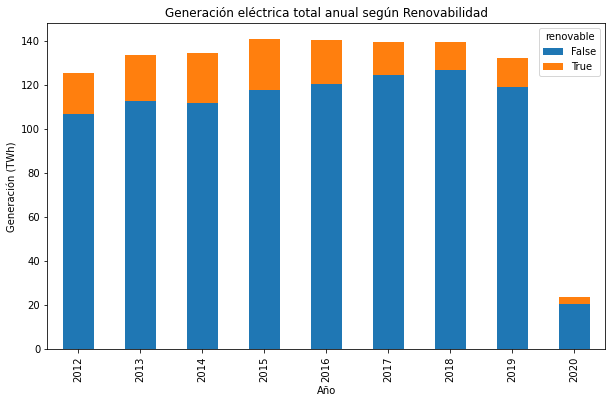

In [19]:
# Generamos un gráfico de barras apiladas:
anual_TWh.unstack().plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Generación eléctrica total anual según Renovabilidad")
plt.xlabel("Año")
plt.ylabel("Generación (TWh)")
plt.show()

In [20]:
# Consultamos la generación neta según año:
generacion_anual_MWh = df.groupby(['anio'])['generacion_neta_MWh'].sum()

# Convertimos los valores a TWh (Terawatts por hora) para una mejor lectura:
generacion_anual_TWh = generacion_anual_MWh / 1000000
generacion_anual_TWh

anio
2012    125.708519
2013    133.540599
2014    134.833988
2015    141.173017
2016    140.786974
2017    139.729473
2018    139.547033
2019    132.257799
2020     23.629170
Name: generacion_neta_MWh, dtype: float64

In [21]:
# Consultamos la demanda neta en MWh según año:
demanda_anual_MWh = df2.groupby(['anio'])['demanda_MWh'].sum()

# Convertimos los valores a TWh (Terawatts por hora) para una mejor lectura:
demanda_anual_TWh = demanda_anual_MWh / 1000000
demanda_anual_TWh

anio
2012    121.188419
2013    148.685929
2014    153.663574
2015    160.096750
2016    145.244259
2017    137.651217
2018    133.224760
2019    129.207755
2020     22.822621
Name: demanda_MWh, dtype: float64

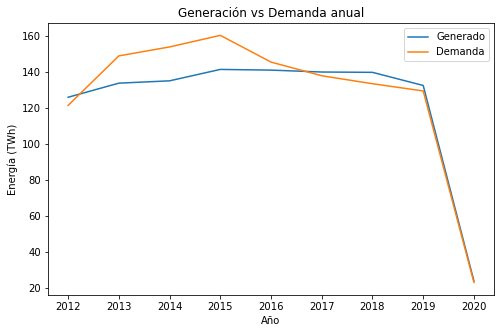

In [22]:
# Graficamos Generacion vs Demanda:
generacion_anual_TWh.plot(label="Generado",figsize=(8, 5))
demanda_anual_TWh.plot(label="Demanda")
plt.title("Generación vs Demanda anual")
plt.xlabel("Año")
plt.ylabel("Energía (TWh)")
plt.legend()
plt.show()

---
### Identificación de Variables:

Condensamos la información disponible en estos dos dataframes en uno sólo:

In [23]:
# Obtenemos la generación total de energía discriminada por año y por mes:
gen_xanioxmes_TWh = (df.groupby(['indice_tiempo'])['generacion_neta_MWh'].sum())/1000000

# Obtenemos la generación de energía renovable discriminada por año y por mes:
df_reno = df[df['renovable'] == True]
genreno_xanioxmes_TWh = (df_reno.groupby(['indice_tiempo'])['generacion_neta_MWh'].sum())/1000000

# Obtenemos la demanda de energía discriminada por año y por mes:
demanda_xanioxmes_TWh = (df2.groupby(['indice_tiempo'])['demanda_MWh'].sum())/1000000

# Creamos un nuevo DataFrame condensando toda esta información anual/mensual:
df_totales = pd.DataFrame()
df_totales['total_generado_TWh'] = gen_xanioxmes_TWh
df_totales['renovable_generado_TWh'] = genreno_xanioxmes_TWh
df_totales['%_renovable'] = df_totales['renovable_generado_TWh']*100/df_totales['total_generado_TWh']
df_totales['demanda_TWh'] = demanda_xanioxmes_TWh
df_totales['%_cubierto'] = df_totales['total_generado_TWh']*100/df_totales['demanda_TWh']
df_totales['%_cubierto_renovables'] = df_totales['renovable_generado_TWh']*100/df_totales['demanda_TWh']

df_totales

,total_generado_TWh,renovable_generado_TWh,%_renovable,demanda_TWh,%_cubierto,%_cubierto_renovables
indice_tiempo,,,,,,
2012-01,11.254383,1.763412,15.668671,10.804700,104.161924,16.320789
2012-02,10.477590,1.516395,14.472744,10.085552,103.887120,15.035317
2012-03,10.546927,1.291358,12.243923,10.175365,103.651581,12.691019
2012-04,9.280070,1.512408,16.297372,8.969068,103.467486,16.862482
2012-05,10.080649,1.903697,18.884663,9.597272,105.036611,19.835810
...,...,...,...,...,...,...
2019-10,10.593192,1.268718,11.976725,10.382601,102.028306,12.219650
2019-11,10.641549,1.290268,12.124815,10.559481,100.777201,12.219049
2019-12,11.524032,1.505874,13.067250,11.175325,103.120334,13.474991
